## 1. Data visualization

In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
csv_file_path='./data/driving_log.csv'
driving_log = pd.read_csv(csv_file_path)

In [3]:
driving_log.head()

center  \
0  IMG/center_2016_12_01_13_30_48_287.jpg   
1  IMG/center_2016_12_01_13_30_48_404.jpg   
2  IMG/center_2016_12_01_13_31_12_937.jpg   
3  IMG/center_2016_12_01_13_31_13_037.jpg   
4  IMG/center_2016_12_01_13_31_13_177.jpg   

                                    left  \
0   IMG/left_2016_12_01_13_30_48_287.jpg   
1   IMG/left_2016_12_01_13_30_48_404.jpg   
2   IMG/left_2016_12_01_13_31_12_937.jpg   
3   IMG/left_2016_12_01_13_31_13_037.jpg   
4   IMG/left_2016_12_01_13_31_13_177.jpg   

                                    right  steering  throttle  brake  \
0   IMG/right_2016_12_01_13_30_48_287.jpg       0.0       0.0    0.0   
1   IMG/right_2016_12_01_13_30_48_404.jpg       0.0       0.0    0.0   
2   IMG/right_2016_12_01_13_31_12_937.jpg       0.0       0.0    0.0   
3   IMG/right_2016_12_01_13_31_13_037.jpg       0.0       0.0    0.0   
4   IMG/right_2016_12_01_13_31_13_177.jpg       0.0       0.0    0.0   

       speed  
0  22.148290  
1  21.879630  
2   1.453011  
3   1.438419  
4   1.418236

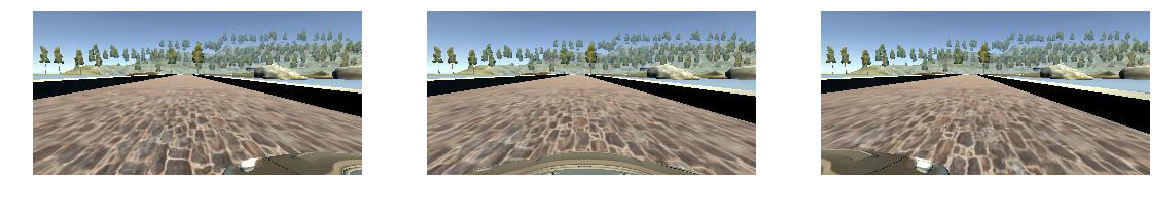

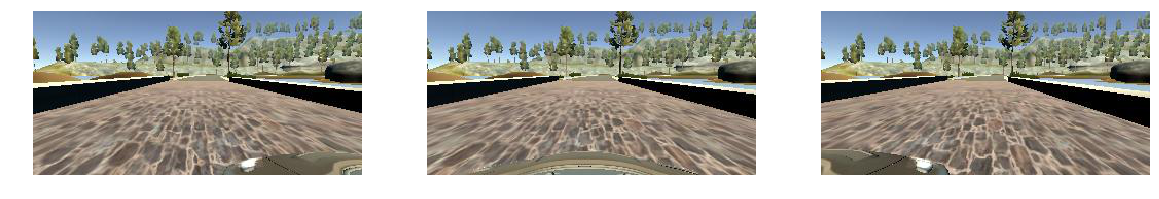

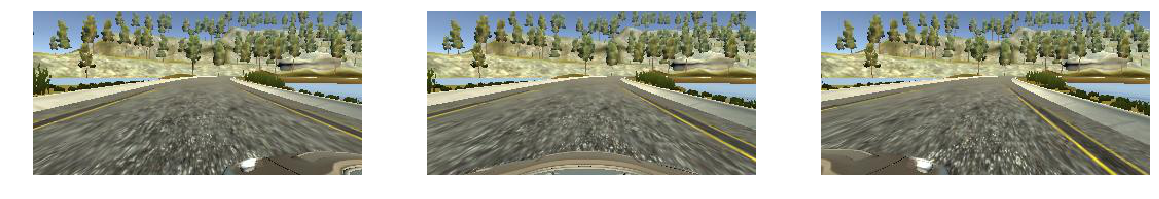

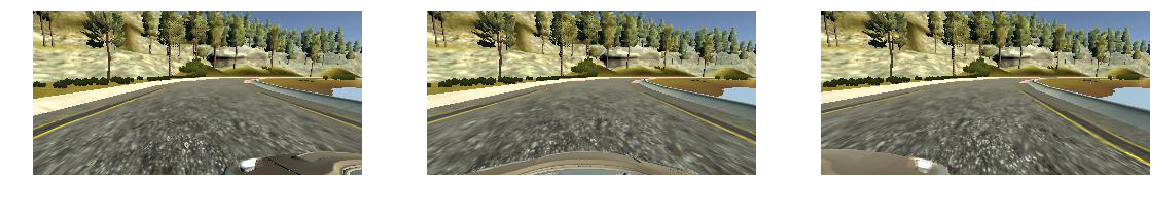

In [4]:
for i in range(100,300,50):
    front_img_path = './data/' + driving_log['center'][i].strip()
    left_img_path = './data/' + driving_log['left'][i].strip()
    right_img_path = './data/' + driving_log['right'][i].strip()

    front_img = mpimg.imread(front_img_path)
    left_img = mpimg.imread(left_img_path)
    right_img = mpimg.imread(right_img_path)
    
    fig, axes = plt.subplots(1,3, figsize=(20,8))
    axes[0].imshow(left_img)
    if(i==0):
        axes[0].set_title('Left')
    axes[0].axis('off')
    axes[1].imshow(front_img)
    if(i==0):
        axes[1].set_title('Center')
    axes[1].axis('off')
    axes[2].imshow(right_img)
    if(i==0):
        axes[2].set_title('Right')
    axes[2].axis('off')

### Observations
1. Top portion of the image are just skey and trees and does not contribute to any learning and thus they can be removed.
2. Few pixels in the bottom of the image are also not needed.

## 2. Cropping Images

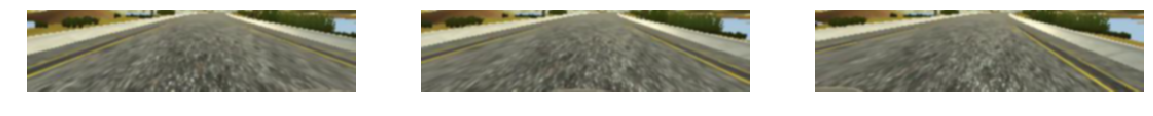

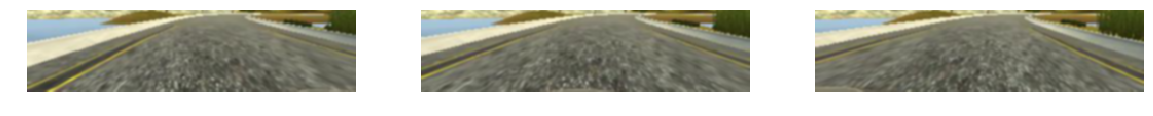

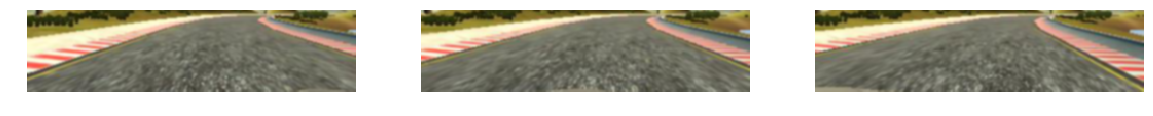

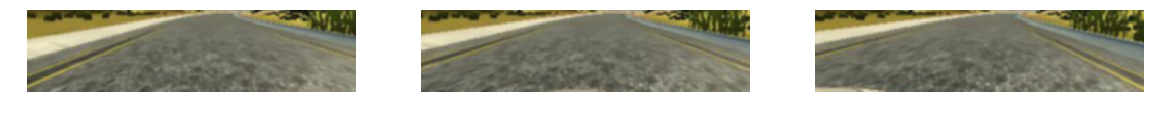

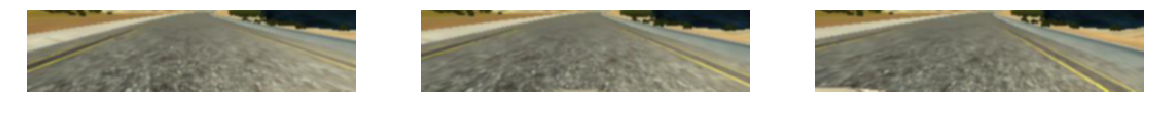

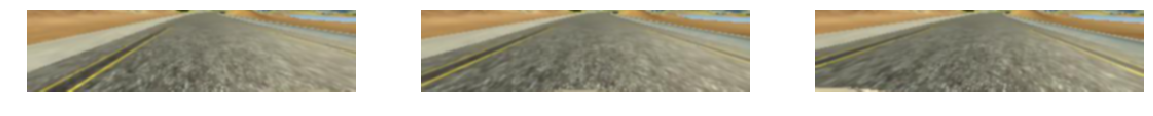

In [6]:
for i in range(1000,1300,50):
    front_img_path = './data/' + driving_log['center'][i].strip()
    left_img_path = './data/' + driving_log['left'][i].strip()
    right_img_path = './data/' + driving_log['right'][i].strip()

    front_img = mpimg.imread(front_img_path)[60:140, :]
    left_img = mpimg.imread(left_img_path)[60:140, :]
    right_img = mpimg.imread(right_img_path)[60:140, :]
    
    fig, axes = plt.subplots(1,3, figsize=(20,8))
    axes[0].imshow(left_img)
    if(i==0):
        axes[0].set_title('Left')
    axes[0].axis('off')
    axes[1].imshow(front_img)
    if(i==0):
        axes[1].set_title('Center')
    axes[1].axis('off')
    axes[2].imshow(right_img)
    if(i==0):
        axes[2].set_title('Right')
    axes[2].axis('off')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5011d36080>]], dtype=object)

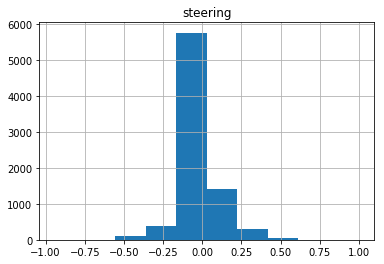

In [38]:
driving_log.hist(column='steering')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5012197518>]], dtype=object)

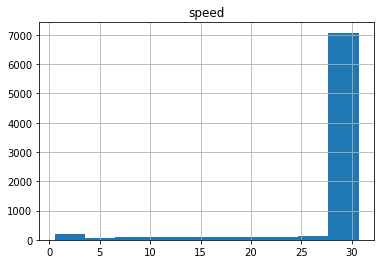

In [40]:
driving_log.hist(column='speed')

### Observations
1. Most of the steering angle is zero on the negative side. This contributes a bias for the vehicle to run to the left. this can be reduced by flippling the images in the dataset

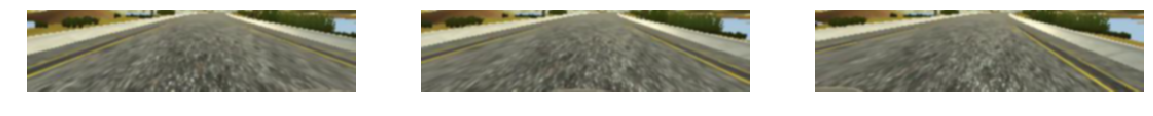

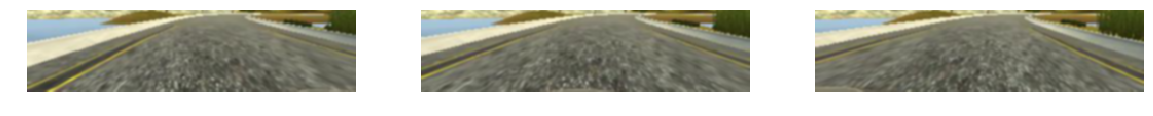

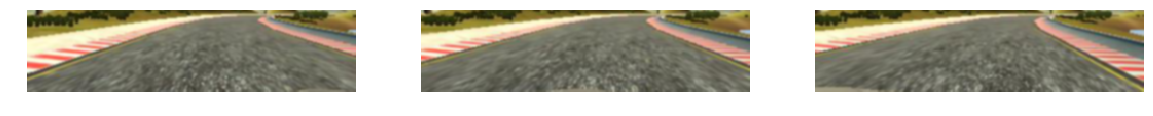

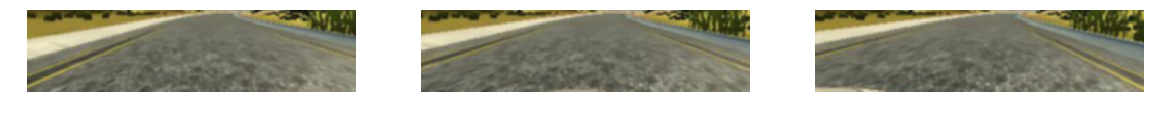

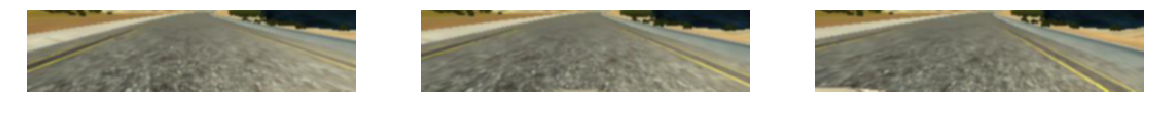

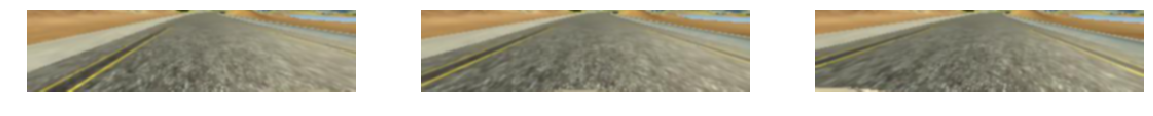

In [7]:
for i in range(1000,1300,50):
    front_img_path = './data/' + driving_log['center'][i].strip()
    left_img_path = './data/' + driving_log['left'][i].strip()
    right_img_path = './data/' + driving_log['right'][i].strip()

    front_img = mpimg.imread(front_img_path)[60:140, :]
    left_img = mpimg.imread(left_img_path)[60:140, :]
    right_img = mpimg.imread(right_img_path)[60:140, :]
    
    front_img = cv2.GaussianBlur(front_img,(5,5),0)
    left_img = cv2.GaussianBlur(left_img,(5,5),0)
    right_img = cv2.GaussianBlur(right_img,(5,5),0)
    
    fig, axes = plt.subplots(1,3, figsize=(20,8))
    axes[0].imshow(left_img)
    if(i==0):
        axes[0].set_title('Left')
    axes[0].axis('off')
    axes[1].imshow(front_img)
    if(i==0):
        axes[1].set_title('Center')
    axes[1].axis('off')
    axes[2].imshow(right_img)
    if(i==0):
        axes[2].set_title('Right')
    axes[2].axis('off')

### Observations
This did not work well as expected

## 3. Stacking images into one


(80, 960, 3)
(80, 960, 3)
(80, 960, 3)
(80, 960, 3)
(80, 960, 3)
(80, 960, 3)


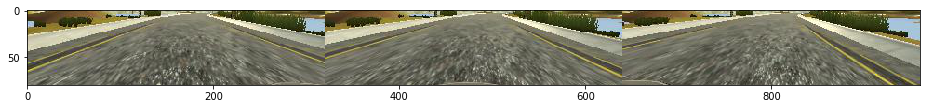

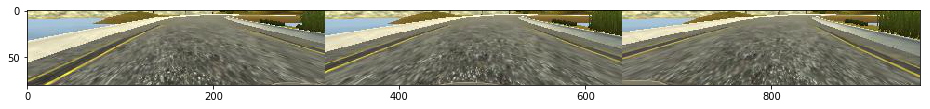

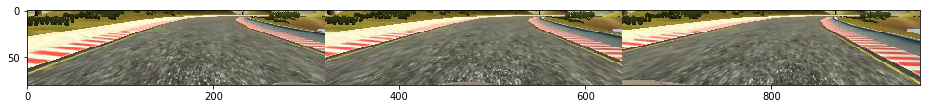

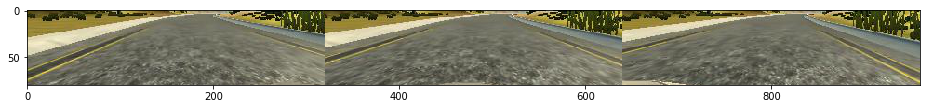

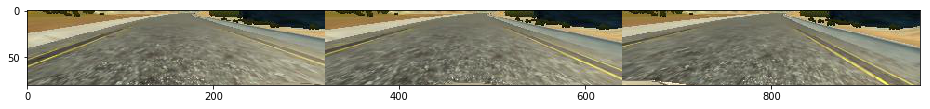

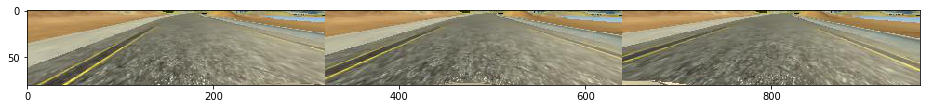

In [17]:
for i in range(1000,1300,50):
    front_img_path = './data/' + driving_log['center'][i].strip()
    left_img_path = './data/' + driving_log['left'][i].strip()
    right_img_path = './data/' + driving_log['right'][i].strip()

    front_img = mpimg.imread(front_img_path)[60:140, :]
    left_img = mpimg.imread(left_img_path)[60:140, :]
    right_img = mpimg.imread(right_img_path)[60:140, :]
    
    full_img = np.hstack((left_img, front_img, right_img))
    
    print(full_img.shape)

    plt.figure(figsize=(16,18))
    plt.imshow(full_img)


### Observation
This didnot work as the simulator gives an image of size 160, 320, 3 as input to our network so this kind of model is not acceptacle

In [ ]:
def translate_img(image, steer):
    """
    randomly translate image horizantally, make corresponding 
    adjustment in the steering angle also
    """
    max_shift = 55
    max_ang = 0.14  # ang_per_pixel = 0.0025

    rows, cols, _ = image.shape

    random_shift = np.random.randint(-max_shift, max_shift + 1)
    dst_steer = steer + (random_shift / max_shift) * max_ang
    if abs(dst_steer) > 1:
        dst_steer = -1 if (dst_steer < 0) else 1

    mat = np.float32([[1, 0, random_shift], [0, 1, 0]])
    dst_img = cv2.warpAffine(image, mat, (cols, rows))
    return dst_img, dst_steer


In [ ]:
def brightness_img(image):
    """
    randomly change brightness
    """
    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random = np.random.randint(2)
    if random == 0:
        random_bright = 0.2 + np.random.uniform(0.2, 0.6)
        hsv_img[:, :, 2] = hsv_img[:, :, 2] * random_bright
    op_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
    return op_img


In [ ]:
def flip_img(image, steering):
    """ flip the image"""
    flip_image, flip_steering = cv2.flip(image, 1), -steering
    return flip_image, flip_steering

In [ ]:
def augment_img(image, steering):
    """
    data augmentation
    transformed image & crop
    """
    image, steering = translate_img(image, steering)
    image, steering = flip_img(image, steering)
    image = brightness_img(image)
    # image = generate_shadow(image)
#     image = crop_img(image)
    return image, steering